# 🛸우주대스타 덕구를 진짜 우주로!

## 목차
1. 라이브러리 & 데이터 불러오기
  - Problem : 배경 이미지와 대상이미지는 왜 크기가 같아야 할까? 
2. 모델 및 세그멘테이션 함수 선택
3. 이미지 분할, 배열 값 확인
4. Color map 조정 (BGR->RGB)
5. 이미지 합치기 : 덕구를 우주로!


소회:
- 모델 새로운 것 사용해보고싶다.(사용못해서 아쉽다)
- 사람 이미지 본인 셀카로 시도해보고 싶다.
- 오류해결 부분 돌려보고싶다.

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(540, 540, 3)


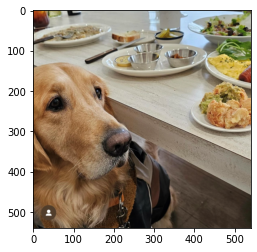

In [2]:
# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dogbig.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape) # 이미지 크기 확인

# 불러온 이미지 확인
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(사진출처 : 인스타그램 "life_of_duckoo")

(380, 503, 3)


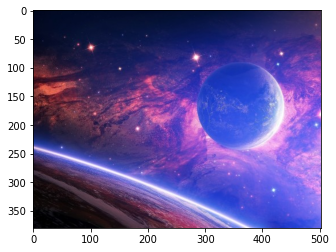

In [3]:
# 배경 이미지 불러오기
img_path_space = os.getenv('HOME')+'/aiffel/human_segmentation/images/space.png'  
img_orig_space = cv2.imread(img_path_space) 

print(img_orig_space.shape) # 이미지 크기 확인

# 불러온 벼경 이미지 확인
plt.imshow(cv2.cvtColor(img_orig_space, cv2.COLOR_BGR2RGB))
plt.show()

### Problem : concat오류 
- 덕구를 보다 더 큰 우주로 보내고픈 마음에 배경 이미지를 크게 늘렸지만 아래 concat진행시 오류가 떴다.
    - 이미지 크기 확인 img_orig_space : (380, 503, 3)
    - 이미지 크기 변경 img_resized_space.shape :(550, 650, 3)
    (오류 이미지)
    
    

- SOLUTION : "작은 우주도 우주다!"
    - 우주 배경이미지 크기 조정함 (덕구 사진과 동일한 크기로 줄임!)
    

### Solution : 우주 배경사진 사이즈 조정

Resized shape: (540, 540, 3)


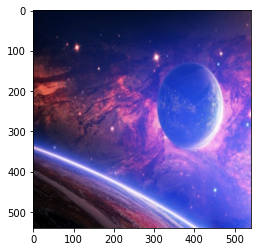

In [25]:
# 이미지 크기 확인 img_orig_space : (380, 503, 3)
# 이미지 크기 변경 img_resized_space.shape :(550, 650, 3)

# 이미지 크기 변경 # (550, 650, 3)
new_size = (540, 540)  # (width, height)
img_resized_space = cv2.resize(img_orig_space, new_size)

# 변경된 배경이미지 크기 확인
print("Resized shape:", img_resized_space.shape)  # (550, 750, 3)
# 시각화 
plt.imshow(cv2.cvtColor(img_resized_space, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 모델 및 세그멘테이션 함수 선택

#### PixelLib의 pascalvoc 새그맨테이션 함수 동물도 잘 인식한다고 하여서 그대로 사용

In [35]:
# 모델 가져오기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드 시작
urllib.request.urlretrieve(model_url, model_file) 
# 원리 : 
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7ec9241386a0>)

#### 인스턴스 & 모델 선택 : semantic segmentation & pascalvoc

In [5]:
 #PixelLib 클래스를 가져와서 semantic segmentation 인스턴스를 만듬
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

## 3. 이미지 분할, 배열 값 확인

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

✅ segmentAsPascalvoc()함수를 호출 하여 입력된 이미지의 "분할, 분할 출력의 배열"을 가져옴  
✅ 분할은, pacalvoc 데이터로 학습된 모델을 이용하여 진행됨

In [7]:
# pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

#### ✅함수`segmentAsPascalvoc()`호출하여 얻는 결과값(segvalues, output)확인. 

In [8]:
# segvalues중 인스턴스로 인식된 것 확인 (class_ids)
print(segvalues)

{'class_ids': array([ 0,  5, 11, 12]), 'masks': array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}


In [9]:
# segvalues중 인스턴스로 인식된 것 확인 (영문명)
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
diningtable
dog


#### ✅ Output 시각화하여, 인스턴스 구분 잘됐나 확인

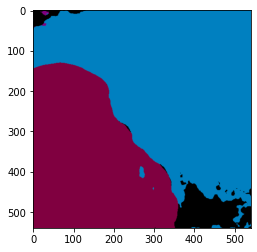

In [10]:
# segmentAsPascalvoc() 함수 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 
# output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

## 4. Color map 조정 (BGR->RGB)

#### ✅ 조정해주면서, class_id 4개의 rgb를 알아보자!
     *BUT HOW?*
- 그 다음 color map에서 (LABEL_NAMES index따라 매칭됨) 인스턴스별 컬러코드 확인하기
- 배경(0), 병(5), 식탁(11), 개(12)

In [11]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

print(colormap[0])   # 배경
print(colormap[5])   # 병
print(colormap[11])  # 식탁
print(colormap[12])  # 개

[0 0 0]
[128   0 128]
[192 128   0]
[ 64   0 128]


#### ✅ Dog의 색상순서 바꿔주기 : BGR 순으로 정리된 color map을 RGB로 바꿔주기
- person ( 64   0 128)는 사실 (128, 0, 64)인것!

In [12]:
seg_color = (128,0,64) # RGB -> BGR 

(540, 540)


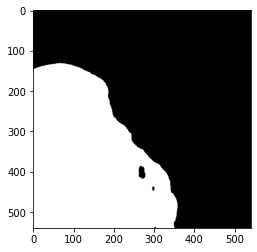

In [13]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

#### TEST : 원본이미지(img_show)와 마스크이미지(img_mask) 가중치 정해서 합쳐보기

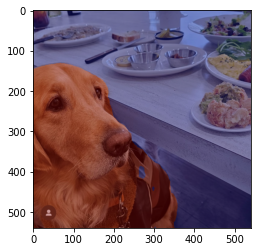

In [22]:
# 원본이미지를 img_show에 할당한뒤 
# 이미지 dog이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 5. 이미지 합치기 : 덕구를 우주로!

#### ✅ 배경 이미지 아주 살짝만 흐리게! (덕구가 잘보여야 하니깐요!)

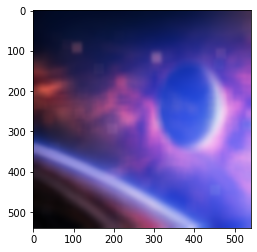

In [26]:
img_space_blur = cv2.blur(img_resized_space, (25,25))  # (img_resized_space, (99,99))
plt.imshow(cv2.cvtColor(img_space_blur, cv2.COLOR_BGR2RGB)) # BGR 형식 -> RGB 형식   
plt.show()

#### ✅ 배경 이미지에 덕구 자리를 만들어줘요!

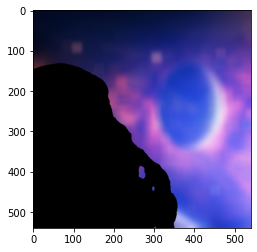

In [31]:
# Dog의 마스크 인식
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not() 사용하여, 배경 : 0 -> 255 , 덕구(dog) : 255 -> 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and() 사용하여 블러 처리된 우주배경이미지에 덕구 자리를 만들어 준다
img_bg_blur = cv2.bitwise_and(img_space_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### ✅우주대스타를 우주로! (`np.where`로 두 사진 합치기)

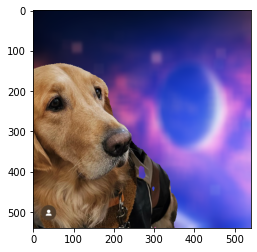

In [32]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 오류 해결 방법 제안

- Problem : 배경과 대상사진 사이즈를 다르게 할 수는 없을까?(동일하지 않을 시 오류)
- 대안적 Solution : resize 해서 배경 압축

*HOWEVER*
- 배경 압축 시 사진이 덜 이쁘다. → 사용자 입장에서 달갑지 않은 이슈!
=> 해결해보고자한다.

---